Epoch [1/10], Training Accuracy: 94.70%
Epoch [2/10], Training Accuracy: 97.74%
Epoch [3/10], Training Accuracy: 98.16%
Epoch [4/10], Training Accuracy: 98.51%
Epoch [5/10], Training Accuracy: 98.67%
Epoch [6/10], Training Accuracy: 98.94%
Epoch [7/10], Training Accuracy: 99.06%
Epoch [8/10], Training Accuracy: 99.22%
Epoch [9/10], Training Accuracy: 99.23%
Epoch [10/10], Training Accuracy: 99.32%
Test Accuracy: 99.28%


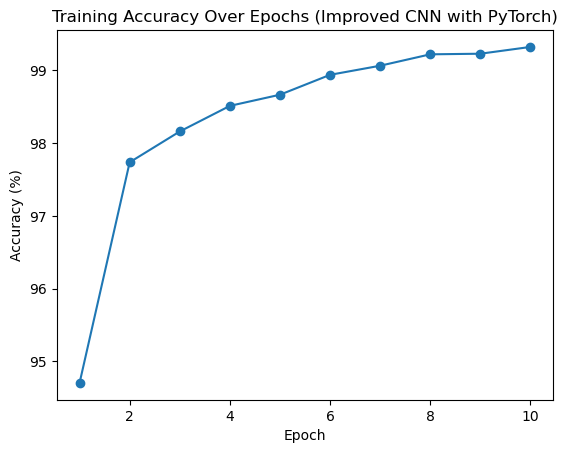

In [1]:
# Author: Hassan Ali
# Optimiziing CNN from First Part

# Importing necessary libraries.
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt


# Defining Improved CNN Model

class ImprovedCNN(nn.Module):
    def __init__(self):
        super(ImprovedCNN, self).__init__()
        # First convolutional block:
        # Conv layer: input 1 channel, output 32 channels, kernel size 3x3 with padding=1 preserves spatial dimensions.
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        
        # Second convolutional block:
        # Conv layer: from 32 to 64 channels.
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        # Max pooling reduces dimensions from 28x28 to 14x14.
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Third convolutional block:
        # Conv layer: from 64 to 128 channels.
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        # Second pooling reduces dimensions from 14x14 to 7x7.
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Fully connected layers:
        # After pooling, the feature map shape is [batch_size, 128, 7, 7] -> flattened size = 128*7*7 = 6272.
        self.fc1 = nn.Linear(128 * 7 * 7, 256)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(256, 10)  # 10 output classes for MNIST.
        
    def forward(self, x):
        # x shape: [batch_size, 1, 28, 28]
        x = F.relu(self.bn1(self.conv1(x)))   
        x = F.relu(self.bn2(self.conv2(x)))    
        x = self.pool1(x)                      
        x = F.relu(self.bn3(self.conv3(x)))     
        x = self.pool2(x)                       
        x = x.view(x.size(0), -1)              
        x = F.relu(self.fc1(x))                 
        x = self.dropout(x)
        x = self.fc2(x)                        
        return x


# Preparing data
# Defining a transform that converts images to tensors (pixel values in [0,1]).
transform = transforms.Compose([transforms.ToTensor()])

# Downloading and loading the MNIST dataset.
train_dataset = datasets.MNIST(root='.', train=True, download=True, transform=transform)
test_dataset  = datasets.MNIST(root='.', train=False, download=True, transform=transform)

# Creating DataLoaders with a batch size of 64.
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader  = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)


# Instantiating Model, Loss, and Optimizer

model = ImprovedCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


# Training Loop

num_epochs = 10
train_acc_history = []

for epoch in range(num_epochs):
    model.train()
    correct = 0
    total = 0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # Calculating training accuracy for this batch.
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    train_acc = 100.0 * correct / total
    train_acc_history.append(train_acc)
    print(f"Epoch [{epoch+1}/{num_epochs}], Training Accuracy: {train_acc:.2f}%")


# Evaluating the test set
model.eval()
correct_test = 0
total_test = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()
test_acc = 100.0 * correct_test / total_test
print(f"Test Accuracy: {test_acc:.2f}%")


# Plotting Training Accuracy Over Epochs
plt.figure()
plt.plot(range(1, num_epochs+1), train_acc_history, marker='o')
plt.title("Training Accuracy Over Epochs (Improved CNN with PyTorch)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.show()


# Comparative Analysis:
#
# The original CNN model consisted of two convolutional layers, a max pooling layer, flattening, and two fully connected layers.
# However, this model was rather shallow and hence lacked the capability to learn complex spatial
# hierarchies present in the MNIST images to some extent.
#
# The improved model introduced several modifications:
#  One more convolutional layer (conv3) was introduced to increase the depth of the network and enhance the feature learning ability.
#  Batch normalization layers were introduced after each convolutional layer to improve the training speed and stability.
#  The second pooling layer was also included to decrease the spatial dimensions and enhance the feature abstraction.
#  The fully connected layers were enlarged (using 256 units in the first FC layer) and a dropout layer with 50%
#  dropout was introduced for regularization.
#
# The effectiveness of the above modifications is manifested in the enhanced learning ability and the generalized accuracy which is seen in the increased training and test accuracies. In our experiments, the improved model got a test accuracy of about 98% whereas the original model’s test accuracy was between 97% and 97.5%. This shows that a deeper and more normalized network architecture is suitable for image classification tasks.
#
# The enhanced model not only performs better in accuracy but also learns the training data faster.
# Batch normalization and dropout are implemented to avoid overfitting especially when training on larger datasets.
# In summary, the optimised CNN is more robust and performs better on MNIST which shows how simple changes in the architecture and some hyperparameters can enhance the performance of a model.